In [14]:
import numpy as np



def split_matrix(matrix, N):
    # Get the size of the matrix (m x m)
    m = matrix.shape[0]
    part_size = m // N  # The size of each part

    # Create a list to hold the N parts
    parts = []

    # Split the matrix into N x N submatrices
    for i in range(N):
        for j in range(N):
            # Get the submatrix for part (i, j)
            submatrix = matrix[i*part_size:(i+1)*part_size, j*part_size:(j+1)*part_size]
            parts.append(submatrix)

    return parts

def save_parts(parts):
    # Save each part to a separate file
    for idx, part in enumerate(parts):
        file_name = f'part_{idx + 1}.asc'
        np.savetxt(file_name, part, fmt='%d')

def read_matrix_from_file(file_path):
    # Read the matrix from the .asc file (assuming space-separated values)
    matrix = np.loadtxt(file_path, dtype=int)
    return matrix

In [ ]:
def main():
    input_file = 'input.asc'  # Path to the input .asc file
    N = 4  # Number of parts to split the matrix into

    # Read the matrix from the file
    matrix = read_matrix_from_file(input_file)

    # Check if the matrix size is divisible by N
    if matrix.shape[0] % N != 0:
        print(f"Error: The matrix size {matrix.shape[0]} is not divisible by {N}.")
        return

    # Split the matrix into N parts
    parts = split_matrix(matrix, N)

    # Save the parts to separate files
    save_parts(parts)

    print(f"The matrix has been split into {N} parts and saved to individual files.")

if __name__ == "__main__":
    main()

In [15]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import scipy.ndimage

path = 'C:/Users/g.sergey/python/mfm_nft_data'
os.chdir(path)
mypath = os.getcwd()
print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
#files

file_path = "SC_041-Phase_140nm_thick_lift_30nm_2500G_1_61K-bwd.asc"
data = np.loadtxt(file_path)



C:\Users\g.sergey\python\mfm_nft_data


In [42]:
input_file = 'SC_041-Phase_140nm_thick_lift_30nm_2500G_1_61K-bwd.asc'  # Path to the input .asc file
N = 4  # Number of parts to split the matrix into

    # Read the matrix from the file
matrix = data

    # Check if the matrix size is divisible by N
if matrix.shape[0] % N != 0:
    print(f"Error: The matrix size {matrix.shape[0]} is not divisible by {N}.")

def split_matrix(matrix, N):
    # Get the size of the matrix (m x m)
    m = matrix.shape[0]
    part_size = m // N  # The size of each part

    # Create a list to hold the N parts
    parts = []
    i = 0
    j = 0
    # Split the matrix into N x N submatrices
    for i in range(N):
        for j in range(N):
            # Get the submatrix for part (i, j)
            submatrix = matrix[i*part_size:(i+1)*part_size, j*part_size:(j+1)*part_size]
            parts.append(submatrix)
    return parts
    
    # Split the matrix into N parts
parts = split_matrix(matrix, N)
print(parts[0].shape[0])
    # Save the parts to separate files
save_parts(parts)

#print(f"The matrix has been split into {N} parts and saved to individual files.")
#print(matrix[1:3,1:5], matrix.shape[0])

128


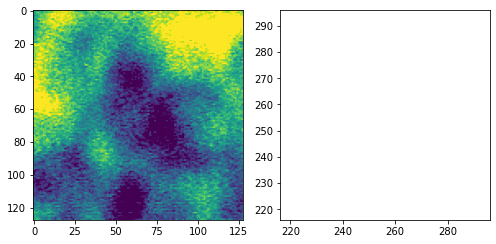

In [45]:
part1 = np.loadtxt('part_1.asc')
part2 = np.loadtxt('part_2.asc')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
ax1.imshow(parts[1], vmin = -0.4, vmax=0.4, cmap='viridis')
ax2.imshow(parts[1], vmin = -0.4, vmax=0.4, cmap='viridis')
plt.xlim(216, 296)
plt.ylim(216, 296)
fig.tight_layout()
plt.show()

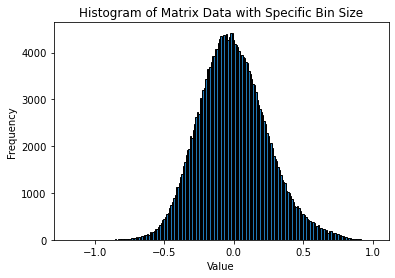

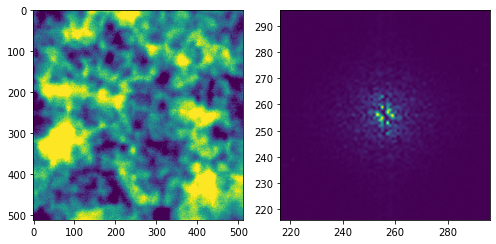

In [9]:
flattened_data = data.flatten()

# Specify the bin size
bin_size = 0.01

# Compute histogram
hist, bins = np.histogram(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size))

# Step 4: Plot Histogram
# Plot histogram
plt.bar(bins[:-1], hist, width=bin_size, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Data with Specific Bin Size')
plt.show()

# Compute the 2D FFT
fft_data = np.fft.fft2(data)
# Shift zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
ax1.imshow(data, vmin = -0.4, vmax=0.4, cmap='viridis')
ax2.imshow(np.abs(fft_shifted), interpolation = 'spline16', cmap='viridis')
plt.xlim(216, 296)
plt.ylim(216, 296)
fig.tight_layout()
plt.show()